# <center><font color=#10e2e6>Kaggle Playground: Predicting Loan Approval</font></center>

#### <center>This notebook will attempt to provide a good way to learn all the basic Machine Learning concepts and as a way for me to remember what exactly I learned a while back. This specific competition is attempting to create a machine learning algorithm that can successfully predict whether a loan will get approved or not.</center>

Numpy, Pandas, and Matplotlib are standard libraries used in Data Science. I would recommend that if you do not understand what is typed below to learn some Python basics and then see what each library does.

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('/Users/poodle/Data Science Projects/Kaggle Playground/playground-series-s4e10/train.csv')
test = pd.read_csv('/Users/poodle/Data Science Projects/Kaggle Playground/playground-series-s4e10/test.csv')

train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


One thing to notice below is that there are few object type columns. This means that it is not represented as a number by Python (it could be possible that a number is hidden as a string). So we are going to need to change the columns to be integers.


In [127]:
train.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

Below we are going to be using scikit-learn's LabelEncoder to convert the strings into integers. 

In [128]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
lbl.fit(train['person_home_ownership'])
train['person_home_ownership'] = lbl.transform(train['person_home_ownership'])
lbl.fit(train['loan_intent'])
train['loan_intent'] = lbl.transform(train['loan_intent'])
lbl.fit(train['loan_grade'])
train['loan_grade'] = lbl.transform(train['loan_grade'])
lbl.fit(train['cb_person_default_on_file'])
train['cb_person_default_on_file'] = lbl.transform(train['cb_person_default_on_file'])

lbl.fit(test['person_home_ownership'])
test['person_home_ownership'] = lbl.transform(test['person_home_ownership'])
lbl.fit(test['loan_intent'])
test['loan_intent'] = lbl.transform(test['loan_intent'])
lbl.fit(test['loan_grade'])
test['loan_grade'] = lbl.transform(test['loan_grade'])
lbl.fit(test['cb_person_default_on_file'])
test['cb_person_default_on_file'] = lbl.transform(test['cb_person_default_on_file'])

train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,0,5.0,1,3,25000,15.95,0.21,1,10,0
58641,58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8,1
58642,58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2,1
58643,58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3,0


In [129]:
from sklearn.model_selection import train_test_split

X = train.drop(['loan_status', 'id'], axis=1)
y = train['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=.3)

In [130]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

predictions = model.predict(X_test)

print('ROC_AUC: ', roc_auc_score(y_test, predictions))

ROC_AUC:  0.8767290926721213


In [131]:
sublesson = pd.DataFrame()
sublesson['id'] = test.id

feats = test.select_dtypes(include=[np.number]).drop(['id'], axis=1).interpolate()
predictions = model.predict(feats)

sublesson['loan_status'] = predictions
sublesson.to_csv('PS_S4E10.csv', index=False)

sublesson

,id,loan_status
0,58645,0.908417
1,58646,0.092108
2,58647,0.482653
3,58648,0.046733
4,58649,0.227842
...,...,...
39093,97738,0.085224
39094,97739,0.047079
39095,97740,0.092368
39096,97741,0.624331


In [132]:
print('Public Score: .87357')

Public Score: .87357


In [133]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)
test_scaled = pd.DataFrame(ss.fit_transform(test),columns=test.columns)

In [134]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

input_shape = [X_train.shape[1]]

In [145]:
model = keras.Sequential([
    #512 indicates how many 'neurons' we want. 'activation' sets the function to use, which it is set to  'relu' also known as 'Rectified Linear Unit'. 
    #'input_shape' is set to how many columns are in the training dataset
    #rate is the frequency it sets inputs to 0, in this case 30% of the time.
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.7027 - loss: 0.5358 - val_AUC: 0.7868 - val_loss: 0.3321
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7452 - loss: 0.3516 - val_AUC: 0.7863 - val_loss: 0.3258
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7645 - loss: 0.3376 - val_AUC: 0.7942 - val_loss: 0.3228
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7647 - loss: 0.3361 - val_AUC: 0.7943 - val_loss: 0.3191
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7719 - loss: 0.3292 - val_AUC: 0.7951 - val_loss: 0.3216
Epoch 6/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7718 - loss: 0.3355 - val_AUC: 0.7932 - val_loss: 0.3190
Epoch 7/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7771 - loss: 0.3296 - val_AUC: 0.7937 - val_loss: 0.3216
Epoch 8/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7692 - loss: 0.3308 - val_AUC: 0.7934 - val_loss: 0.3203
Epoch 9/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AU

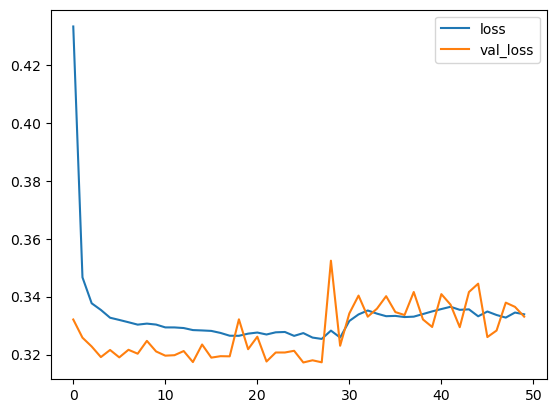

In [146]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_auc',
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=50,
    verbose=1
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum Validation Loss: {:0.4f}'.format(history_df['val_loss'].min()))

In [147]:
predictions = model.predict(X_test)

print('ROC AUC: ', roc_auc_score(y_test, predictions))

550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
ROC AUC:  0.7860649521283491


In [148]:
sublesson = pd.DataFrame()
sublesson['id'] = test.id

feats = test.select_dtypes(include=[np.number]).drop(['id'], axis=1).interpolate()
predictions = model.predict(feats)

sublesson['loan_status'] = predictions
sublesson.to_csv('PS_S4E10.csv', index=False)

sublesson

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step


,id,loan_status
0,58645,0.644836
1,58646,0.072342
2,58647,0.156232
3,58648,0.135155
4,58649,0.072392
...,...,...
39093,97738,0.155932
39094,97739,0.139218
39095,97740,0.134226
39096,97741,0.682603


In [139]:
print('Public Score: 0.55403')

Public Score: 0.55403


Did worse, but could possibly be changed if I fix the scaling problem I had and training settings.

In [149]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators=10, learning_rate=.35, max_depth=3, verbosity=1)
xgbc.fit(X_train, y_train)

print('Score: ', xgbc.score(X_train, y_train))

predictions = xgbc.predict(X_test)

print('ROC AUC: ', roc_auc_score(y_test, predictions))

Score:  0.9449708898686999
ROC AUC:  0.8335234746996203


In [150]:
sublesson = pd.DataFrame()
sublesson['id'] = test.id

feats = test.select_dtypes(include=[np.number]).drop(['id'], axis=1).interpolate()
predictions = xgbc.predict(feats)

sublesson['loan_status'] = predictions
sublesson.to_csv('PS_S4E10.csv', index=False)

sublesson

,id,loan_status
0,58645,1
1,58646,0
2,58647,0
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,0


In [151]:
print('Public Score: .83862')

Public Score: .83862


Did slightly worse, but this could be changed further depending on the different settings

In [154]:
xgbc = XGBClassifier(gamma=600, n_estimators=10, learning_rate=.35, max_depth=3, verbosity=1)
xgbc.fit(X_train, y_train)

print('Score: ', xgbc.score(X_train, y_train))

predictions = xgbc.predict(X_test)

print('ROC AUC: ', roc_auc_score(y_test, predictions))

Score:  0.9274804511461353
ROC AUC:  0.8079529135973151


In [155]:
sublesson = pd.DataFrame()
sublesson['id'] = test.id

feats = test.select_dtypes(include=[np.number]).drop(['id'], axis=1).interpolate()
predictions = xgbc.predict(feats)

sublesson['loan_status'] = predictions
sublesson.to_csv('PS_S4E10.csv', index=False)

sublesson

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,0


This time with gamma I did worse.